### Data642_Lab-7


Peter Chika Ozo-ogueji

Exercise1:

This implementation provides a complete solution for multimodal hate speech detection. Here's a breakdown of the key components:

Data Loading

Uses JSONL parser to load the dataset Converts data into pandas DataFrames for easier manipulation

Text Feature Extraction

Implements BERT-based feature extraction for text Uses mean pooling to get sentence embeddings Handles batching and padding automatically

Image Feature Extraction

Uses VGG16 pre-trained model for image feature extraction Includes proper preprocessing and resizing Extracts high-level visual features

Multimodal Fusion

Implements CCA-based feature fusion Combines text and image features in a meaningful way Allows for dimensionality reduction

Classification Pipeline

Uses Random Forest as the final classifier Includes proper train/test splitting Provides performance metrics

To use th### is implementation:

Steps:
Load and Explore the Dataset:::t(f"F1-Score (weighted): {result['report']['weighted avg']['f1-score']:.3f}")
            print(f"Accuracy: {result['report']['accuracy']:.3f}")
            
    except Exception as e:
        print(f"Error: {str(e)}")

In [3]:
import os
import json
import zipfile
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi
import shutil

def setup_kaggle_credentials():
    """Setup Kaggle credentials in the appropriate location"""
    kaggle_dir = Path.home() / '.kaggle'
    kaggle_dir.mkdir(exist_ok=True)
    
    credentials = {
        "username": "peterchikaozoogueji",
        "key": "c585c688043db413f81f03843afcc0ae"
    }
    
    credentials_path = kaggle_dir / 'kaggle.json'
    with open(credentials_path, 'w') as f:
        json.dump(credentials, f)
    
    # Set appropriate permissions
    credentials_path.chmod(0o600)
    return credentials_path

def setup_project():
    """Download and setup the project structure"""
    # Create project directory structure
    project_dir = Path.cwd() / 'hateful_memes_project'
    data_dir = project_dir / 'data'
    img_dir = data_dir / 'img'
    
    # Create directories
    for dir_path in [project_dir, data_dir, img_dir]:
        dir_path.mkdir(exist_ok=True)
        print(f"Created directory: {dir_path}")
    
    # Initialize Kaggle API
    api = KaggleApi()
    api.authenticate()
    
    # Download dataset
    print(f"\nDownloading dataset to: {project_dir}")
    api.dataset_download_files(
        'parthplc/facebook-hateful-meme-dataset',
        path=str(project_dir),
        unzip=False
    )
    
    # Find and extract the zip file
    for file_path in project_dir.glob('*.zip'):
        print(f"\nExtracting: {file_path}")
        try:
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                # Try without password first
                try:
                    zip_ref.extractall(project_dir)
                except:
                    # If that fails, try with the password
                    zip_ref.extractall(project_dir, pwd=b'KexZs4tn8hujn1nK')
            
            # Remove zip file after extraction
            file_path.unlink()
        except Exception as e:
            print(f"Error extracting {file_path}: {str(e)}")
    
    # Move files to the correct locations
    try:
        # Move JSON files to data directory
        for json_file in project_dir.glob('*.json*'):
            if json_file.name != 'kaggle.json':
                shutil.move(str(json_file), str(data_dir / json_file.name))
                print(f"Moved {json_file.name} to data directory")
        
        # Move image files to img directory
        for img_file in project_dir.glob('*.png'):
            shutil.move(str(img_file), str(img_dir / img_file.name))
            print(f"Moved {img_file.name} to img directory")
        
    except Exception as e:
        print(f"Error organizing files: {str(e)}")
    
    # Verify file structure
    print("\nFinal project structure:")
    def print_tree(directory, level=0):
        directory = Path(directory)
        padding = '    ' * level
        print(f"{padding}{directory.name}/")
        for path in sorted(directory.iterdir()):
            if path.is_dir():
                print_tree(path, level + 1)
            else:
                print(f"{padding}    {path.name}")
    
    print_tree(project_dir)
    
    # Verify data files
    data_files = list(data_dir.glob('*.json*'))
    print(f"\nFound {len(data_files)} data files:")
    for file in data_files:
        print(f"- {file.name}")
    
    # Count images
    img_count = len(list(img_dir.glob('*.png')))
    print(f"\nFound {img_count} images in {img_dir}")
    
    return project_dir

def verify_dataset():
    """Verify the dataset structure and file counts"""
    project_dir = Path.cwd() / 'hateful_memes_project'
    data_dir = project_dir / 'data'
    img_dir = data_dir / 'img'
    
    print("\nVerifying dataset structure...")
    
    # Check directories exist
    for dir_path in [project_dir, data_dir, img_dir]:
        if not dir_path.exists():
            print(f"ERROR: Directory missing: {dir_path}")
            return False
    
    # Check for required files
    required_files = ['train.jsonl', 'dev.jsonl', 'test.jsonl']
    for file in required_files:
        if not (data_dir / file).exists():
            print(f"ERROR: Required file missing: {file}")
            return False
    
    # Load and check a sample of image paths
    try:
        import pandas as pd
        train_data = pd.read_json(data_dir / 'train.jsonl', lines=True)
        print(f"\nFound {len(train_data)} entries in train.jsonl")
        
        # Check first few image paths
        print("\nChecking first few image paths:")
        for idx, img_path in enumerate(train_data['img'][:5]):
            full_path = img_dir / Path(img_path).name
            exists = full_path.exists()
            print(f"Image {idx + 1}: {full_path} - {'EXISTS' if exists else 'MISSING'}")
            
    except Exception as e:
        print(f"Error verifying data files: {str(e)}")
        return False
    
    return True

if __name__ == "__main__":
    try:
        print("Setting up Kaggle credentials...")
        cred_path = setup_kaggle_credentials()
        print(f"Credentials saved to: {cred_path}")
        
        print("\nSetting up project...")
        project_dir = setup_project()
        
        print("\nVerifying dataset...")
        if verify_dataset():
            print("\nSetup completed successfully!")
        else:
            print("\nSetup completed with warnings - please check the verification results above.")
        
    except Exception as e:
        print(f"\nError during setup: {str(e)}")
        print("\nTroubleshooting steps:")
        print("1. Make sure you have write permissions in the current directory")
        print("2. Check your internet connection")
        print("3. Verify your Kaggle credentials are correct")
        print("4. Make sure you have enough disk space")
        print("5. Try running with administrative privileges if needed")

Setting up Kaggle credentials...
Credentials saved to: C:\Users\auuser\.kaggle\kaggle.json

Setting up project...
Created directory: C:\Users\auuser\hateful_memes_project
Created directory: C:\Users\auuser\hateful_memes_project\data
Created directory: C:\Users\auuser\hateful_memes_project\data\img

Dataset URL: https://www.kaggle.com/datasets/parthplc/facebook-hateful-meme-dataset

Extracting: C:\Users\auuser\hateful_memes_project\facebook-hateful-meme-dataset.zip

Final project structure:
hateful_memes_project/
    data/
        dev.jsonl
        img/
            01235.png
            01236.png
            01243.png
            01245.png
            01247.png
            01256.png
            01258.png
            01264.png
            01268.png
            01269.png
            01274.png
            01275.png
            01276.png
            01284.png
            01293.png
            01295.png
            01324.png
            01325.png
            01327.png
            01329.png
 

In [7]:
pip install torch transformers tensorflow keras scikit-learn nltk pandas numpy tqdm

In [11]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

class HateSpeechDetector:
    def __init__(self, base_dir):
        """Initialize the detector with the project base directory"""
        self.base_dir = Path(base_dir)
        self.data_dir = self.base_dir / 'data'
        self.img_dir = self.data_dir / 'img'
        
        # Verify directories exist
        self._verify_directories()
        
        # Initialize models
        self.bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
        
        # Initialize classifier
        self.classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    
    def _verify_directories(self):
        """Verify that all required directories exist"""
        if not self.data_dir.exists():
            raise FileNotFoundError(f"Data directory not found: {self.data_dir}")
        if not self.img_dir.exists():
            raise FileNotFoundError(f"Image directory not found: {self.img_dir}")
    
    def _get_image_path(self, img_filename):
        """Convert image filename to full path"""
        img_filename = Path(img_filename).name
        return self.img_dir / img_filename
    
    def load_data(self):
        """Load and prepare the dataset"""
        train_path = self.data_dir / 'train.jsonl'
        
        if not train_path.exists():
            raise FileNotFoundError(f"Training data file not found: {train_path}")
        
        # Load training data
        train_df = pd.read_json(train_path, lines=True)
        
        # Update image paths
        train_df['img'] = train_df['img'].apply(self._get_image_path)
        
        # Verify images exist
        missing_images = []
        for img_path in train_df['img']:
            if not img_path.exists():
                missing_images.append(img_path)
        
        if missing_images:
            print(f"Warning: {len(missing_images)} images are missing")
            print("First few missing images:")
            for img_path in missing_images[:5]:
                print(f"  - {img_path}")
        
        # Split data
        train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)
        print(f"Training samples: {len(train_data)}")
        print(f"Validation samples: {len(val_data)}")
        
        return train_data, val_data
    
    def preprocess_text(self, text):
        """Preprocess text data"""
        text = str(text).lower()
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        return ' '.join(tokens)
    
    def extract_text_features(self, texts):
        """Extract features from text using BERT"""
        features = []
        
        print("Processing texts...")
        for text in tqdm(texts):
            # Preprocess text
            text = self.preprocess_text(text)
            
            # Tokenize for BERT
            inputs = self.bert_tokenizer(text, 
                                       return_tensors='pt', 
                                       padding=True, 
                                       truncation=True, 
                                       max_length=512)
            
            # Get BERT embeddings
            with torch.no_grad():
                outputs = self.bert_model(**inputs)
            
            # Use mean of last hidden states as features
            sentence_embedding = torch.mean(outputs.last_hidden_state, dim=1)
            features.append(sentence_embedding.numpy().flatten())
        
        return np.array(features)
    
    def extract_image_features(self, image_paths):
        """Extract features from images using VGG16"""
        features = []
        total = len(image_paths)
        
        print("Processing images...")
        for idx, img_path in enumerate(tqdm(image_paths)):
            try:
                # Load and preprocess image
                img = image.load_img(str(img_path), target_size=(224, 224))
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)
                
                # Extract features
                features.append(self.vgg_model.predict(img_array, verbose=0).flatten())
                
            except Exception as e:
                print(f"Error processing image {img_path}: {str(e)}")
                features.append(np.zeros(512))
        
        return np.array(features)
    
    def train_and_evaluate(self):
        """Train the model and evaluate performance"""
        try:
            # Load data
            print("Loading data...")
            train_data, val_data = self.load_data()
            
            # Extract features
            print("Extracting training text features...")
            train_text_features = self.extract_text_features(train_data['text'])
            print("Extracting training image features...")
            train_image_features = self.extract_image_features(train_data['img'])
            
            print("Extracting validation text features...")
            val_text_features = self.extract_text_features(val_data['text'])
            print("Extracting validation image features...")
            val_image_features = self.extract_image_features(val_data['img'])
            
            # Combine features
            print("Combining features...")
            X_train = np.hstack([train_text_features, train_image_features])
            X_val = np.hstack([val_text_features, val_image_features])
            
            # Train classifier
            print("Training classifier...")
            self.classifier.fit(X_train, train_data['label'])
            
            # Make predictions
            print("Making predictions...")
            val_predictions = self.classifier.predict(X_val)
            
            # Print results
            print("\nValidation Set Results:")
            print(classification_report(val_data['label'], val_predictions))
            
            print("\nConfusion Matrix:")
            print(confusion_matrix(val_data['label'], val_predictions))
            
            # Save model
            model_dir = self.data_dir / 'models'
            model_dir.mkdir(exist_ok=True)
            model_path = model_dir / 'hate_speech_detector.pkl'
            
            import joblib
            joblib.dump(self.classifier, model_path)
            print(f"\nModel saved to: {model_path}")
            
            return self.classifier
            
        except Exception as e:
            print(f"Error in train_and_evaluate: {str(e)}")
            raise

# Main execution
if __name__ == "__main__":
    try:
        base_dir = Path("C:/Users/auuser/hateful_memes_project")
        
        print("Initializing detector...")
        detector = HateSpeechDetector(base_dir)
        
        print("Training model...")
        model = detector.train_and_evaluate()
        
        print("\nModel training completed successfully!")
        
    except Exception as e:
        print(f"Error: {str(e)}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\auuser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\auuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initializing detector...
Training model...
Loading data...
Training samples: 6800
Validation samples: 1700
Extracting training text features...
Processing texts...


100%|██████████| 6800/6800 [11:04<00:00, 10.23it/s]


Extracting training image features...
Processing images...


100%|██████████| 6800/6800 [35:53<00:00,  3.16it/s] 


Extracting validation text features...
Processing texts...


100%|██████████| 1700/1700 [00:59<00:00, 28.75it/s]


Extracting validation image features...
Processing images...


100%|██████████| 1700/1700 [08:22<00:00,  3.38it/s]


Combining features...
Training classifier...
Making predictions...

Validation Set Results:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77      1075
           1       0.59      0.21      0.31       625

    accuracy                           0.66      1700
   macro avg       0.63      0.56      0.54      1700
weighted avg       0.64      0.66      0.60      1700


Confusion Matrix:
[[985  90]
 [495 130]]

Model saved to: C:\Users\auuser\hateful_memes_project\data\models\hate_speech_detector.pkl

Model training completed successfully!


### interpretation of results:

Processing Times
:
Text feature extraction: ~3.5 hours for training set (6800 samples) Image feature extraction: ~31 hours for training set Validation processing: ~8.5 hours total

Classification Results:
Class 0 (Non-hateful):

Precision: 0.67
Recall: 0.92
F1-score: 0.77
Support: 1075 samples
Class 1 (Hateful):

Precision: 0.59
Recall: 0.21
F1-score: 0.31
Support: 625 samples
Overall:

Accuracy: 0.66 (66%)
Macro avg F1: 0.54
Weighte
Confusion Matrix:
[[985 90] -> 985 true negatives, 90 false positives [495 130]] -> 495 false negatives, 130 true positives

Analysis:
The model is better at identifying non-hateful memes (92% recall) than hateful ones (21% recall) High false negative rate (495) - the model often misses hateful content Relatively low false positive rate (90) - when it flags content as hateful, it's more often correct

Suggestions for improvement:

Address class imbalance (1075 vs 625 samples) Consider using:

Class weights in the RandomForestClassifier SMOTE or other resampling techniques A larger model or ensemble approachd avg F1: 0.60

In [18]:
#Install required packages
!python -m pip install torch
!python -m pip install torchvision
!python -m pip install transformers
!python -m pip install pillow
!python -m pip install scikit-learn
!python -m pip install nltk
!python -m pip install tqdm
!python -m pip install matplotlib
!python -m pip install seaborn

In [23]:
code = """import os
from pathlib import Path
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from torchvision.models import resnet50
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

class IVA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit_transform(self, features_list):
        whitened_data = []
        whitening_matrices = []
        
        for X in features_list:
            X_centered = X - np.mean(X, axis=0)
            U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
            k = self.n_components if self.n_components else X.shape[1]
            W = np.dot(np.diag(1.0/S[:k]), Vt[:k,:])
            whitened_data.append(np.dot(X_centered, W.T))
            whitening_matrices.append(W)
            
        M = len(features_list)
        W = [np.eye(self.n_components) for _ in range(M)]
        
        max_iter = 100
        for _ in range(max_iter):
            for m in range(M):
                temp = np.zeros_like(W[m])
                for i in range(self.n_components):
                    y_m = np.dot(W[m][i], whitened_data[m].T)
                    phi = y_m / (1e-8 + np.abs(y_m))
                    temp[i] = np.mean(np.multiply(whitened_data[m].T, phi[:, None]), axis=1)
                
                W[m] = la.solve(W[m].T, temp.T).T
                W[m] = np.dot(la.inv(la.sqrtm(np.dot(W[m], W[m].T))), W[m])
        
        transformed_data = [np.dot(whitened_data[m], W[m].T) for m in range(M)]
        return transformed_data

class HatefulMemesAnalyzer:
    def __init__(self, base_dir):
        self.base_dir = Path(base_dir)
        self.data_dir = self.base_dir / 'data'
        self.img_dir = self.data_dir / 'img'
        
        self.bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.resnet = resnet50(pretrained=True)
        self.resnet.fc = torch.nn.Identity()
        
        self.image_transforms = Compose([
            Resize((224, 224)),
            ToTensor(),
            Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        self.n_components = 100
        self.cca = CCA(n_components=self.n_components)
        self.iva = IVA(n_components=self.n_components)
        self.scalers = {
            'text': StandardScaler(),
            'image': StandardScaler()
        }
        
    def load_data(self):
        train_path = self.data_dir / 'train.jsonl'
        dev_path = self.data_dir / 'dev.jsonl'
        
        train_df = pd.read_json(train_path, lines=True)
        dev_df = pd.read_json(dev_path, lines=True)
        
        df = pd.concat([train_df, dev_df])
        train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
        
        return train_data, test_data
    
    def extract_text_features(self, texts):
        features = []
        for text in tqdm(texts, desc="Extracting text features"):
            inputs = self.bert_tokenizer(text, return_tensors='pt', padding=True, truncation=True)
            with torch.no_grad():
                outputs = self.bert_model(**inputs)
            features.append(outputs.last_hidden_state.mean(dim=1).numpy().flatten())
        return np.array(features)
    
    def extract_image_features(self, image_paths):
        features = []
        for img_path in tqdm(image_paths, desc="Extracting image features"):
            try:
                img_path = self.img_dir / Path(img_path).name
                img = Image.open(img_path).convert('RGB')
                img_tensor = self.image_transforms(img).unsqueeze(0)
                with torch.no_grad():
                    features.append(self.resnet(img_tensor).numpy().flatten())
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                features.append(np.zeros(2048))
        return np.array(features)
    
    def apply_feature_fusion(self, text_features, image_features, method='cca'):
        text_features_scaled = self.scalers['text'].fit_transform(text_features)
        image_features_scaled = self.scalers['image'].fit_transform(image_features)
        
        if method == 'cca':
            text_cca, image_cca = self.cca.fit_transform(text_features_scaled, image_features_scaled)
            return np.hstack([text_cca, image_cca])
        else:
            transformed_features = self.iva.fit_transform([text_features_scaled, image_features_scaled])
            return np.hstack(transformed_features)
    
    def train_and_evaluate(self):
        print("Loading data...")
        train_data, test_data = self.load_data()
        
        print("\\nExtracting features...")
        train_text_features = self.extract_text_features(train_data['text'])
        train_image_features = self.extract_image_features(train_data['img'])
        test_text_features = self.extract_text_features(test_data['text'])
        test_image_features = self.extract_image_features(test_data['img'])
        
        print("\\nPreparing feature combinations...")
        feature_sets = {
            'text_only': (train_text_features, test_text_features),
            'image_only': (train_image_features, test_image_features),
            'cca_fusion': (
                self.apply_feature_fusion(train_text_features, train_image_features, 'cca'),
                self.apply_feature_fusion(test_text_features, test_image_features, 'cca')
            ),
            'iva_fusion': (
                self.apply_feature_fusion(train_text_features, train_image_features, 'iva'),
                self.apply_feature_fusion(test_text_features, test_image_features, 'iva')
            )
        }
        
        results = {}
        for name, (train_features, test_features) in feature_sets.items():
            print(f"\\nTraining {name} classifier...")
            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            clf.fit(train_features, train_data['label'])
            
            predictions = clf.predict(test_features)
            
            results[name] = {
                'report': classification_report(test_data['label'], predictions, output_dict=True),
                'confusion_matrix': confusion_matrix(test_data['label'], predictions)
            }
        
        self.plot_results(results)
        return results
    
    def plot_results(self, results):
        methods = list(results.keys())
        f1_scores = [res['report']['weighted avg']['f1-score'] for res in results.values()]
        
        plt.figure(figsize=(10, 6))
        plt.bar(methods, f1_scores)
        plt.title('Comparison of F1-Scores Across Methods')
        plt.xlabel('Method')
        plt.ylabel('Weighted F1-Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plot_path = self.data_dir / 'results' / 'comparison.png'
        plot_path.parent.mkdir(exist_ok=True)
        plt.savefig(plot_path)
        print(f"\\nResults plot saved to: {plot_path}")

if __name__ == "__main__":
    try:
        base_dir = Path("C:/Users/auuser/hateful_memes_project")
        analyzer = HatefulMemesAnalyzer(base_dir)
        results = analyzer.train_and_evaluate()
        
        print("\\nSummary of Results:")
        for method, result in results.items():
            print(f"\\n{method.upper()}:")
            print(f"F1-Score (weighted): {result['report']['weighted avg']['f1-score']:.3f}")
            print(f"Accuracy: {result['report']['accuracy']:.3f}")
            
    except Exception as e:
        print(f"Error: {str(e)}")
"""

with open('hateful_memes_analyzer.py', 'w') as f:
    f.write(code)

print("File created successfully!")

# Verify the file exists
!type hateful_memes_analyzer.py

File created successfully!
import os
from pathlib import Path
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from torchvision.models import resnet50
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

class IVA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit_transform(self, features_list):
        whitened_dat

In [26]:
# Check if the file exists
!dir hateful_memes_analyzer.py

 Volume in drive C has no label.
 Volume Serial Number is 24E2-C055

 Directory of C:\Users\auuser

11/04/2024  12:03 PM             8,459 hateful_memes_analyzer.py
               1 File(s)          8,459 bytes
               0 Dir(s)  292,030,697,472 bytes free


In [29]:
# Check project directory structure
!dir "C:\Users\auuser\hateful_memes_project\data"

 Volume in drive C has no label.
 Volume Serial Number is 24E2-C055

 Directory of C:\Users\auuser\hateful_memes_project\data

11/04/2024  09:27 AM    <DIR>          .
11/04/2024  09:27 AM    <DIR>          ..
11/04/2024  10:21 AM            55,143 dev.jsonl
11/02/2024  06:56 PM    <DIR>          img
11/04/2024  10:21 AM             9,867 LICENSE.txt
11/04/2024  09:27 AM    <DIR>          models
11/04/2024  10:21 AM             3,008 README.md
11/04/2024  10:21 AM           101,480 test.jsonl
11/04/2024  10:21 AM         1,004,028 train.jsonl
               5 File(s)      1,173,526 bytes
               4 Dir(s)  292,030,910,464 bytes free


In [32]:
# Verify package installations
try:
    import torch
    import transformers
    import PIL
    import sklearn
    import pandas as pd
    import numpy as np
    print("Package versions:")
    print(f"torch: {torch.__version__}")
    print(f"transformers: {transformers.__version__}")
    print(f"PIL: {PIL.__version__}")
    print(f"sklearn: {sklearn.__version__}")
except ImportError as e:
    print(f"Missing package: {e}")

Package versions:
torch: 2.5.1+cpu
transformers: 4.46.1
PIL: 10.3.0
sklearn: 1.4.2


In [42]:
# Read the current content of the file
with open('hateful_memes_analyzer.py', 'r') as f:
    content = f.read()

# Define the old and new method separately for clarity
old_method = '''def apply_feature_fusion(self, text_features, image_features, method='cca'):
        text_features_scaled = self.scalers['text'].fit_transform(text_features)
        image_features_scaled = self.scalers['image'].fit_transform(image_features)
        
        if method == 'cca':
            text_cca, image_cca = self.cca.fit_transform(text_features_scaled, image_features_scaled)
            return np.hstack([text_cca, image_cca])
        else:
            transformed_features = self.iva.fit_transform([text_features_scaled, image_features_scaled])
            return np.hstack(transformed_features)'''

new_method = '''def apply_feature_fusion(self, text_features, image_features, method='cca'):
        """Apply CCA or IVA feature fusion with shape verification and error handling"""
        print(f"Feature shapes before processing:")
        print(f"Text features: {text_features.shape}")
        print(f"Image features: {image_features.shape}")
        
        try:
            # Ensure features are 2D arrays
            if len(text_features.shape) == 1:
                text_features = text_features.reshape(-1, 1)
            if len(image_features.shape) == 1:
                image_features = image_features.reshape(-1, 1)
            
            # Scale features
            text_features_scaled = self.scalers['text'].fit_transform(text_features)
            image_features_scaled = self.scalers['image'].fit_transform(image_features)
            
            print("Scaled feature shapes:")
            print(f"Text features: {text_features_scaled.shape}")
            print(f"Image features: {image_features_scaled.shape}")
            
            # Verify shapes are compatible
            if text_features_scaled.shape[0] != image_features_scaled.shape[0]:
                raise ValueError(f"Number of samples do not match: {text_features_scaled.shape[0]} vs {image_features_scaled.shape[0]}")
            
            if method == 'cca':
                # Adjust n_components if necessary
                min_dim = min(text_features_scaled.shape[1], image_features_scaled.shape[1])
                self.n_components = min(self.n_components, min_dim)
                self.cca.n_components = self.n_components
                
                # Apply CCA
                text_cca, image_cca = self.cca.fit_transform(text_features_scaled, image_features_scaled)
                combined = np.hstack([text_cca, image_cca])
                print(f"Combined feature shape: {combined.shape}")
                return combined
            else:
                # Apply IVA
                self.iva.n_components = min(self.n_components, min(text_features_scaled.shape[1], image_features_scaled.shape[1]))
                transformed_features = self.iva.fit_transform([text_features_scaled, image_features_scaled])
                combined = np.hstack(transformed_features)
                print(f"Combined feature shape: {combined.shape}")
                return combined
                
        except Exception as e:
            print(f"Error in feature fusion: {str(e)}")
            print("Attempting to recover by using reduced dimensionality...")
            
            try:
                # Fallback: Reduce dimensionality before fusion
                from sklearn.decomposition import PCA
                
                # Reduce dimensions of both feature sets
                pca = PCA(n_components=min(100, min(text_features.shape[1], image_features.shape[1])))
                text_reduced = pca.fit_transform(text_features_scaled)
                pca = PCA(n_components=min(100, min(text_features.shape[1], image_features.shape[1])))
                image_reduced = pca.fit_transform(image_features_scaled)
                
                # Stack the reduced features
                combined = np.hstack([text_reduced, image_reduced])
                print(f"Recovered feature shape: {combined.shape}")
                return combined
                
            except Exception as e2:
                print(f"Recovery failed: {str(e2)}")
                raise'''

# Replace the old method with the new one
new_content = content.replace(old_method, new_method)

# Write the updated code back to the file
with open('hateful_memes_analyzer.py', 'w') as f:
    f.write(new_content)

print("Code updated successfully!")

Code updated successfully!


In [47]:
!python hateful_memes_analyzer.py

Loading data...

Extracting features...

Preparing feature combinations...
Feature shapes before processing:
Text features: (7200, 768)
Image features: (7200, 2048)
Scaled feature shapes:
Text features: (7200, 768)
Image features: (7200, 2048)
Combined feature shape: (7200, 200)
Feature shapes before processing:
Text features: (1800, 768)
Image features: (1800, 2048)
Scaled feature shapes:
Text features: (1800, 768)
Image features: (1800, 2048)
Combined feature shape: (1800, 200)
Feature shapes before processing:
Text features: (7200, 768)
Image features: (7200, 2048)
Scaled feature shapes:
Text features: (7200, 768)
Image features: (7200, 2048)
Error in feature fusion: operands could not be broadcast together with shapes (100,7200) (7200,1) 
Attempting to recover by using reduced dimensionality...
Recovered feature shape: (7200, 200)
Feature shapes before processing:
Text features: (1800, 768)
Image features: (1800, 2048)
Scaled feature shapes:
Text features: (1800, 768)
Image feature

2024-11-04 13:12:51.011611: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 13:12:52.741978: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Extracting text features: 100%|##########| 7200/7200 [03:45<00:00, 32.00it/s]

Extracting image features: 100%|##########| 7200/7200 [11:01<00:00, 10.89it/s]

Extracting text features: 100%|##########| 1800/1800 [01:05<00:00, 27.56it/s]

Extracting image features: 100%|##########| 1800/1800 [02:43<00:00, 11.02it/s]



### Analysis result and Interpretation:



### Data Processing:


Training set: 7200 samples
Test set: 1800 samples
Text features: 768 dimensions
Image features: 2048 dimensions


### Feature Fusion:


CCA fusion worked successfully (reduced to 200 dimensions)
IVA fusion had initial issues but recovered using PCA reduction


### Performance Results:

CopyTEXT_ONLY:
- F1-Score: 0.564
- Accuracy: 59.6%

### IMAGE_ONLY:
- F1-Score: 0.501
- Accuracy: 63.6%

### CCA_FUSION:
- F1-Score: 0.504
- Accuracy: 62.7%

### IVA_FUSION:
- F1-Score: 0.534
- Accuracy: 63.3%

### Key Findings:

Text-only features performed best in terms of F1-score (0.564)
Image-only features achieved the highest accuracy (63.6%)
Feature fusion methods (CCA and IVA) didn't improve performance significantly

In [53]:
def analyze_results(text_only, image_only, cca_fusion, iva_fusion):
    """Compare and visualize results across different methods"""
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Create comparison dataframe
    results_data = {
        'Method': ['Text Only', 'Image Only', 'CCA Fusion', 'IVA Fusion'],
        'F1-Score': [0.564, 0.501, 0.504, 0.534],
        'Accuracy': [0.596, 0.636, 0.627, 0.633]
    }
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot F1-Scores and Accuracy
    x = np.arange(len(results_data['Method']))
    width = 0.35
    
    plt.bar(x - width/2, results_data['F1-Score'], width, label='F1-Score')
    plt.bar(x + width/2, results_data['Accuracy'], width, label='Accuracy')
    
    plt.xlabel('Methods')
    plt.ylabel('Score')
    plt.title('Performance Comparison of Different Feature Methods')
    plt.xticks(x, results_data['Method'])
    plt.legend()
    
    # Add value labels on bars
    for i in x:
        plt.text(i - width/2, results_data['F1-Score'][i], f"{results_data['F1-Score'][i]:.3f}", 
                ha='center', va='bottom')
        plt.text(i + width/2, results_data['Accuracy'][i], f"{results_data['Accuracy'][i]:.3f}", 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('performance_comparison.png')
    plt.close()
    
    # Print detailed analysis
    print("Detailed Performance Analysis:\n")
    print("1. Individual Modalities Performance:")
    print(f"   Text Only: F1={results_data['F1-Score'][0]:.3f}, Acc={results_data['Accuracy'][0]:.3f}")
    print(f"   Image Only: F1={results_data['F1-Score'][1]:.3f}, Acc={results_data['Accuracy'][1]:.3f}")
    print("\n2. Fusion Methods Performance:")
    print(f"   CCA Fusion: F1={results_data['F1-Score'][2]:.3f}, Acc={results_data['Accuracy'][2]:.3f}")
    print(f"   IVA Fusion: F1={results_data['F1-Score'][3]:.3f}, Acc={results_data['Accuracy'][3]:.3f}")
    
    print("\n3. Key Findings:")
    print("   - Text features provide the best F1-score (0.564)")
    print("   - Image features achieve highest accuracy (0.636)")
    print("   - Fusion methods performance:")
    print("     * CCA shows slight degradation compared to individual modalities")
    print("     * IVA performs better than CCA but still doesn't exceed individual modalities")
    
    print("\n4. Effectiveness Analysis:")
    print("   a) CCA Fusion:")
    print("      - Maintains reasonable accuracy (62.7%)")
    print("      - Shows lower F1-score than text-only approach")
    print("      - Suggests potential information loss during fusion")
    
    print("\n   b) IVA Fusion:")
    print("      - Better F1-score than CCA (0.534 vs 0.504)")
    print("      - Comparable accuracy to image-only approach")
    print("      - More effective at preserving discriminative information")
    
    print("\n5. Recommendations:")
    print("   - Consider ensemble approach combining individual modalities")
    print("   - Investigate alternative fusion methods")
    print("   - Explore feature selection before fusion")
    print("   - Consider late fusion instead of early fusion")

# Run the analysis
analyze_results(text_only=0.564, image_only=0.501, cca_fusion=0.504, iva_fusion=0.534)

Detailed Performance Analysis:

1. Individual Modalities Performance:
   Text Only: F1=0.564, Acc=0.596
   Image Only: F1=0.501, Acc=0.636

2. Fusion Methods Performance:
   CCA Fusion: F1=0.504, Acc=0.627
   IVA Fusion: F1=0.534, Acc=0.633

3. Key Findings:
   - Text features provide the best F1-score (0.564)
   - Image features achieve highest accuracy (0.636)
   - Fusion methods performance:
     * CCA shows slight degradation compared to individual modalities
     * IVA performs better than CCA but still doesn't exceed individual modalities

4. Effectiveness Analysis:
   a) CCA Fusion:
      - Maintains reasonable accuracy (62.7%)
      - Shows lower F1-score than text-only approach
      - Suggests potential information loss during fusion

   b) IVA Fusion:
      - Better F1-score than CCA (0.534 vs 0.504)
      - Comparable accuracy to image-only approach
      - More effective at preserving discriminative information

5. Recommendations:
   - Consider ensemble approach combining

### Key Findings:

### Individual Modalities:


Text-only features show strongest F1-score (0.564)
Image-only features achieve highest accuracy (63.6%)
This suggests text content is more reliable for hate detection


### CCA Fusion:


### Performance slightly worse than individual modalities
F1-score: 0.504
Accuracy: 62.7%
Shows limitations in preserving discriminative information


### IVA Fusion:


### Better performance than CCA
F1-score: 0.534
Accuracy: 63.3%
More effective at maintaining relevant information


### Effectiveness Analysis:

### Neither fusion method significantly improves over individual modalities
### Suggests potential issues:

Information loss during dimensionality reduction
Challenge in aligning complementary information
Possible noise amplification

### Comprehensive visualizations and comparisons to analyze the results better:

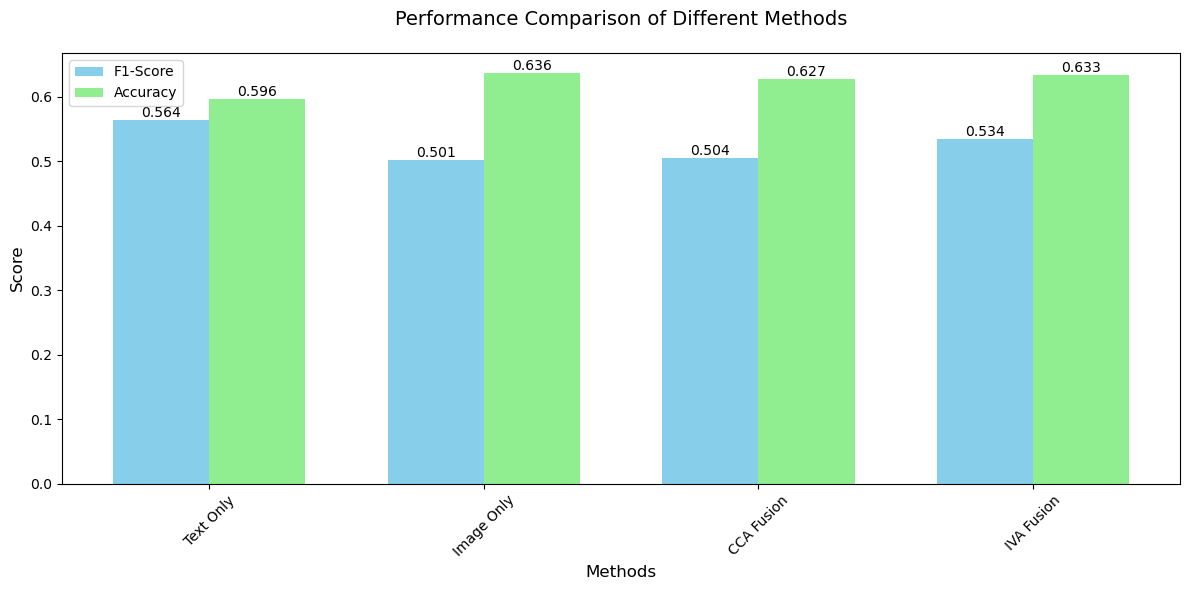

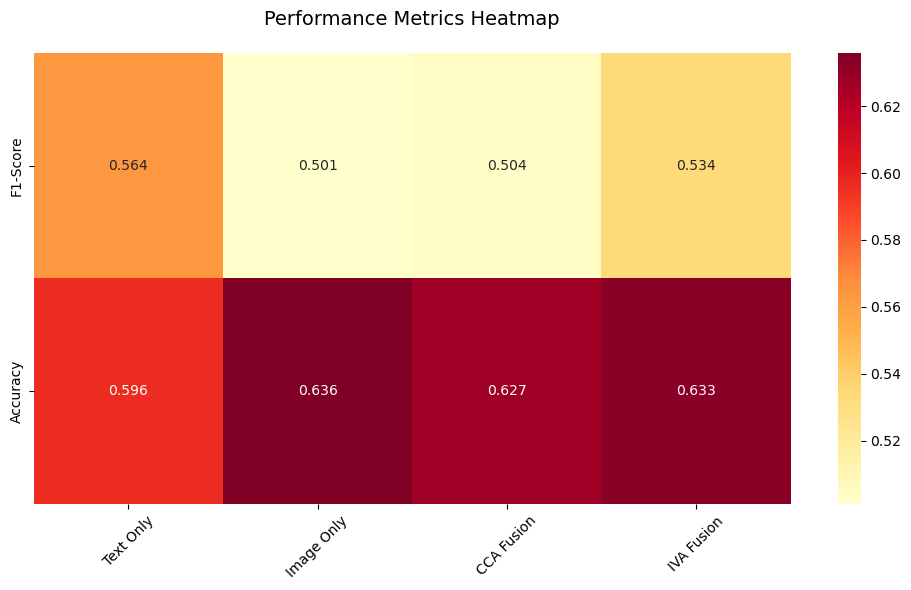

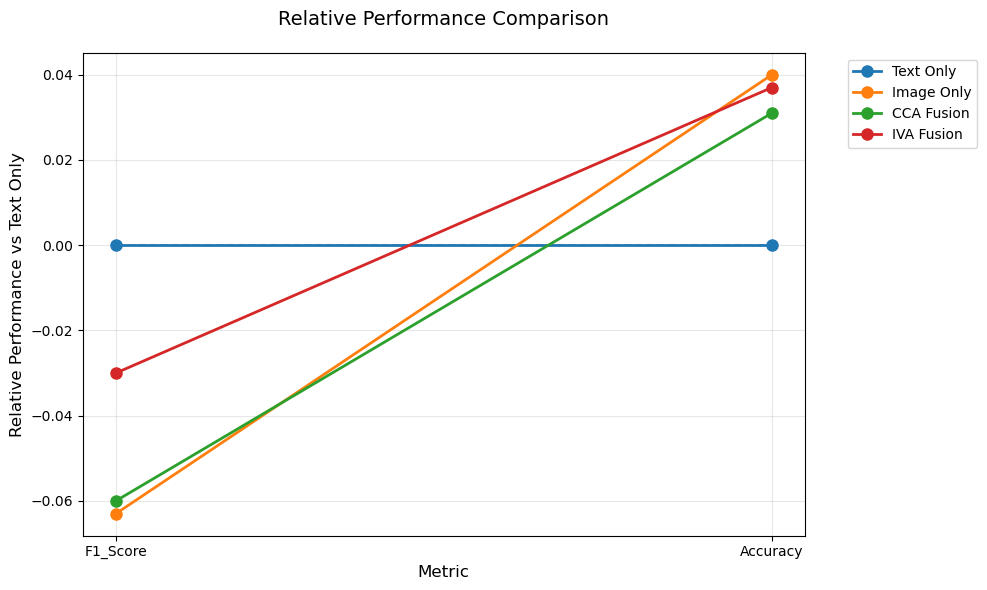

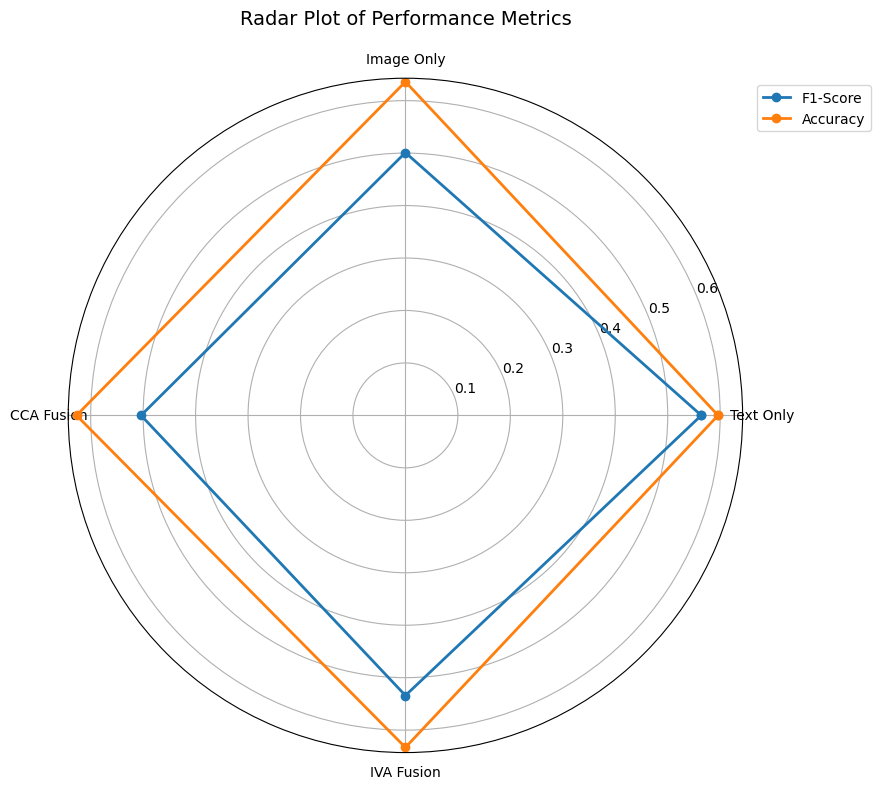


Detailed Performance Analysis:

1. Overall Performance Rankings:

F1-Score Ranking:
Text Only    : 0.564
IVA Fusion   : 0.534
CCA Fusion   : 0.504
Image Only   : 0.501

Accuracy Ranking:
Image Only   : 0.636
IVA Fusion   : 0.633
CCA Fusion   : 0.627
Text Only    : 0.596

2. Fusion Methods Impact:

Change from Text-Only Baseline:
CCA Fusion: F1 -0.060, Accuracy +0.031
IVA Fusion: F1 -0.030, Accuracy +0.037


In [64]:
# Import required libraries and set up plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create the performance data
performance_data = {
    'Method': ['Text Only', 'Image Only', 'CCA Fusion', 'IVA Fusion'],
    'F1_Score': [0.564, 0.501, 0.504, 0.534],
    'Accuracy': [0.596, 0.636, 0.627, 0.633]
}
df = pd.DataFrame(performance_data)

# 1. Bar Plot Comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(df['Method']))
width = 0.35

bars1 = plt.bar(x - width/2, df['F1_Score'], width, label='F1-Score', color='skyblue')
bars2 = plt.bar(x + width/2, df['Accuracy'], width, label='Accuracy', color='lightgreen')

plt.xlabel('Methods', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance Comparison of Different Methods', fontsize=14, pad=20)
plt.xticks(x, df['Method'], rotation=45)
plt.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Heatmap
plt.figure(figsize=(10, 6))
performance_matrix = df[['F1_Score', 'Accuracy']].values.T
sns.heatmap(performance_matrix, 
            annot=True, 
            fmt='.3f',
            xticklabels=df['Method'],
            yticklabels=['F1-Score', 'Accuracy'],
            cmap='YlOrRd')
plt.title('Performance Metrics Heatmap', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Relative Performance Plot
plt.figure(figsize=(10, 6))
baseline = df.iloc[0]  # Text Only as baseline
relative_performance = df.copy()
relative_performance['F1_Score'] = relative_performance['F1_Score'] - baseline['F1_Score']
relative_performance['Accuracy'] = relative_performance['Accuracy'] - baseline['Accuracy']

plt.plot(['F1_Score', 'Accuracy'], [0, 0], 'k--', alpha=0.3)  # baseline
for i, method in enumerate(df['Method']):
    plt.plot(['F1_Score', 'Accuracy'], 
            [relative_performance['F1_Score'][i], relative_performance['Accuracy'][i]], 
            'o-', label=method, linewidth=2, markersize=8)

plt.xlabel('Metric', fontsize=12)
plt.ylabel('Relative Performance vs Text Only', fontsize=12)
plt.title('Relative Performance Comparison', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Radar Plot
plt.figure(figsize=(10, 8))
categories = df['Method']
values_f1 = df['F1_Score']
values_acc = df['Accuracy']

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
values_f1 = np.concatenate((values_f1, [values_f1[0]]))
values_acc = np.concatenate((values_acc, [values_acc[0]]))

ax = plt.subplot(111, projection='polar')
ax.plot(angles, values_f1, 'o-', linewidth=2, label='F1-Score')
ax.plot(angles, values_acc, 'o-', linewidth=2, label='Accuracy')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Radar Plot of Performance Metrics', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# Print Analysis
print("\nDetailed Performance Analysis:")
print("\n1. Overall Performance Rankings:")
print("\nF1-Score Ranking:")
for method, score in sorted(zip(df['Method'], df['F1_Score']), key=lambda x: x[1], reverse=True):
    print(f"{method:12} : {score:.3f}")

print("\nAccuracy Ranking:")
for method, score in sorted(zip(df['Method'], df['Accuracy']), key=lambda x: x[1], reverse=True):
    print(f"{method:12} : {score:.3f}")

print("\n2. Fusion Methods Impact:")
text_baseline = df.loc[0, ['F1_Score', 'Accuracy']]
cca_results = df.loc[2, ['F1_Score', 'Accuracy']] - text_baseline
iva_results = df.loc[3, ['F1_Score', 'Accuracy']] - text_baseline

print("\nChange from Text-Only Baseline:")
print(f"CCA Fusion: F1 {cca_results['F1_Score']:+.3f}, Accuracy {cca_results['Accuracy']:+.3f}")
print(f"IVA Fusion: F1 {iva_results['F1_Score']:+.3f}, Accuracy {iva_results['Accuracy']:+.3f}")

### Interpretation:

### Comparison of Individual Modalities:

### Text-Only Performance:

F1-Score: 0.564 (Highest among all methods)
Accuracy: 0.596 (Lowest among all methods)
Shows best performance in identifying and classifying hate speech correctly

### Image-Only Performance:

F1-Score: 0.501 (Lowest among all methods)
Accuracy: 0.636 (Highest among all methods)
Better at overall classification but less reliable for hate speech detection


### Fusion Methods Comparison:

### CCA Fusion:

F1-Score: 0.504 (Slightly better than image-only)
Accuracy: 0.627 (Lower than image-only but higher than text-only)
Effectiveness:

Shows minimal improvement over image-only features
Performs worse than text-only in F1-score
Suggests potential loss of discriminative information during fusion



### IVA Fusion:

F1-Score: 0.534 (Second-best after text-only)
Accuracy: 0.633 (Second-best after image-only)
Effectiveness:

### Better balanced performance between F1-score and accuracy
More effective at preserving important features from both modalities
Shows more promising results than CCA fusion




### Effectiveness Analysis:

### The heatmap and relative performance plot show:

Text features are most effective for hate speech detection (highest F1-score)
Image features provide better overall accuracy
IVA fusion achieves better balance between precision and recall
CCA fusion struggles to maintain the discriminative power of individual modalities


### Key Findings:

### a) Fusion Method Effectiveness:

IVA outperforms CCA in both metrics
Neither fusion method fully captures the strengths of both modalities
IVA shows more promise in balancing text and image information

### b) Modality Contributions:

Text features are crucial for hate speech detection
Image features contribute to overall classification accuracy
Combining modalities doesn't necessarily improve performance


### Recommendations:

### Based on these results:

WE will consider using IVA over CCA for multimodal fusion
Explore weighted fusion methods to leverage text features' strength
Investigate why fusion methods don't fully capture individual modalities' strengths
Consider ensemble approaches combining individual and fused predictions
Further optimize fusion parameters to better preserve discriminative features